<a id="33">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; text-align: center; font-style: normal; background-color: lightpink; color :black;"> Student Performance Analysis</h1>

In [27]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">1. Loading Dataset  </h1>


In [28]:
import pandas as pd

# Read the datasets
df_1 = pd.read_csv('student-mat.csv', sep=';')
df_2 = pd.read_csv('student-por.csv', sep=';')

# Merge the datasets vertically (concatenate rows)
main_df = pd.concat([df_1, df_2], ignore_index=True)
main_df.reset_index(drop=True, inplace=True)

# Mearged Dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [29]:
main_df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
497,GP,M,15,U,GT3,T,4,4,services,other,...,5,3,3,1,1,5,2,12,13,12
445,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,0,14,13,13
564,GP,M,17,R,LE3,T,1,2,other,other,...,2,2,2,3,3,5,14,9,8,10
511,GP,M,15,U,GT3,T,4,4,other,teacher,...,4,4,3,1,1,2,4,16,15,16
609,GP,F,16,U,GT3,T,4,3,health,other,...,4,3,5,1,5,2,2,14,14,15



<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">2. exploring data types of each column in dataset</h1>


In [30]:
#exploring the data types of each column and preparing a dataframe
#from first dataset
data_type = {}
for col in main_df.columns:
    data_type[col] = main_df[col].dtype
tp= list(data_type.items())

# creating a dataframe
data_type = pd.DataFrame(data=tp , columns=['column' , "Dtype"])
data_type.head()

,column,Dtype
0,school,object
1,sex,object
2,age,int64
3,address,object
4,famsize,object




<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">3. Explore the range of values for numerics values and distinct values for catagorical values</h1>


<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">3.1) Range for numeric Values</h1>



##### Range is the difference between the highest and lowest value . It helps understand how much the distribution is spread


In [31]:
#finding range for first dataset
range_dict_1 = {}
for col in main_df.columns:
    if main_df[col].dtype == "int64":
        range_dict_1[col] = main_df[col].max() - main_df[col].min()

#range_dict_1
# converting to dataframe
range_dict_1 = pd.DataFrame(data=list(range_dict_1.items()) , columns=['Column' ,'range'])
range_dict_1.style.background_gradient(cmap='coolwarm')

,Column,range
0,age,7
1,Medu,4
2,Fedu,4
3,traveltime,3
4,studytime,3
5,failures,3
6,famrel,4
7,freetime,4
8,goout,4
9,Dalc,4




<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">3.2) distinct values for catagorical values
</h1>


In [32]:
Distinct_val = {}  #empty dictonary
Unique_val = {}    
 
for col in df_1.columns:
    if main_df[col].dtype == "object":
        Distinct_val[col] = main_df[col].nunique()
        Unique_val[col] = list(main_df[col].unique())

# Creating a DataFrame from the dictionaries
Distinct_val_df = pd.DataFrame(list(Distinct_val.items()), columns=['Column', 'Distinct_val_no'])
Unique_val_df = pd.DataFrame(list(Unique_val.items()), columns=['Column', 'Unique_values'])

# Merging the two DataFrames
final_df = pd.merge(Distinct_val_df, Unique_val_df, on='Column')

# Display the DataFrame with a gradient background
final_df.style.background_gradient(cmap='coolwarm')


,Column,Distinct_val_no,Unique_values
0,school,2,"['GP', 'MS']"
1,sex,2,"['F', 'M']"
2,address,2,"['U', 'R']"
3,famsize,2,"['GT3', 'LE3']"
4,Pstatus,2,"['A', 'T']"
5,Mjob,5,"['at_home', 'health', 'other', 'services', 'teacher']"
6,Fjob,5,"['teacher', 'other', 'services', 'health', 'at_home']"
7,reason,4,"['course', 'other', 'home', 'reputation']"
8,guardian,3,"['mother', 'father', 'other']"
9,schoolsup,2,"['yes', 'no']"



<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">4. Distribution of each column
</h1>


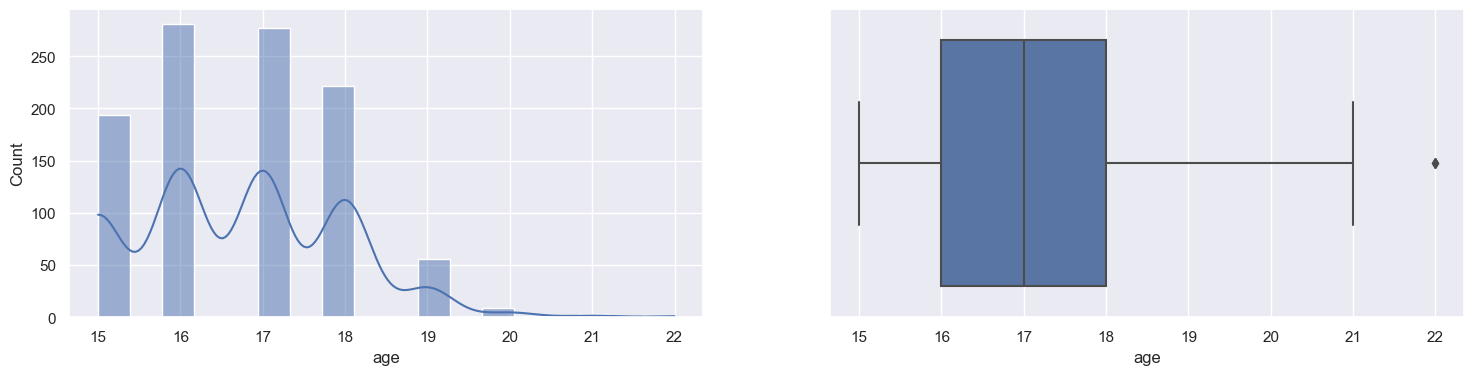

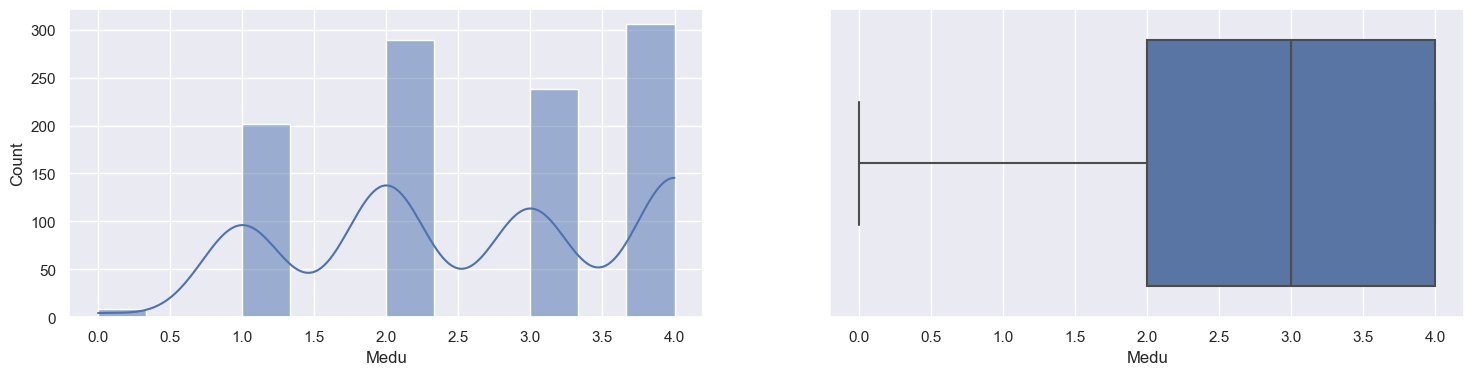

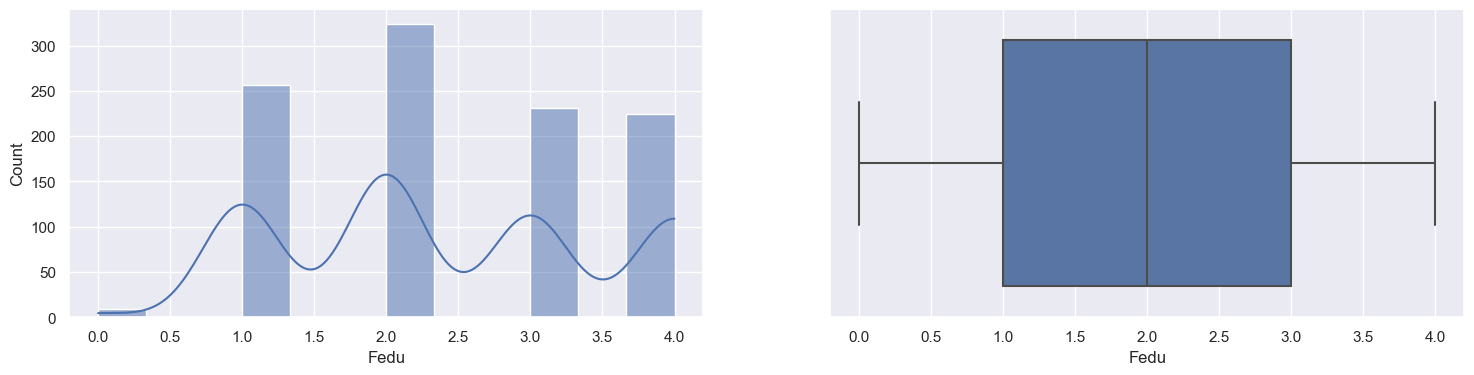

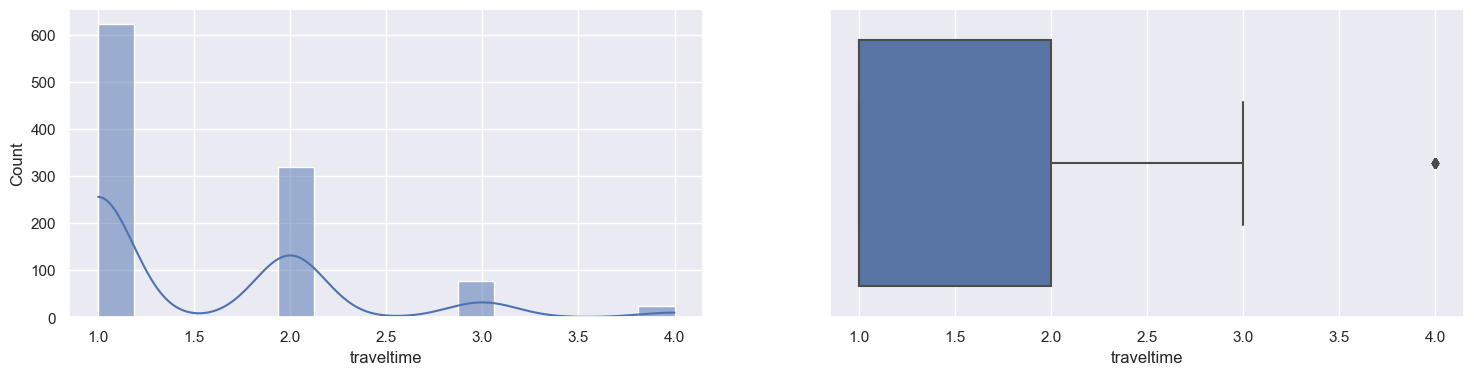

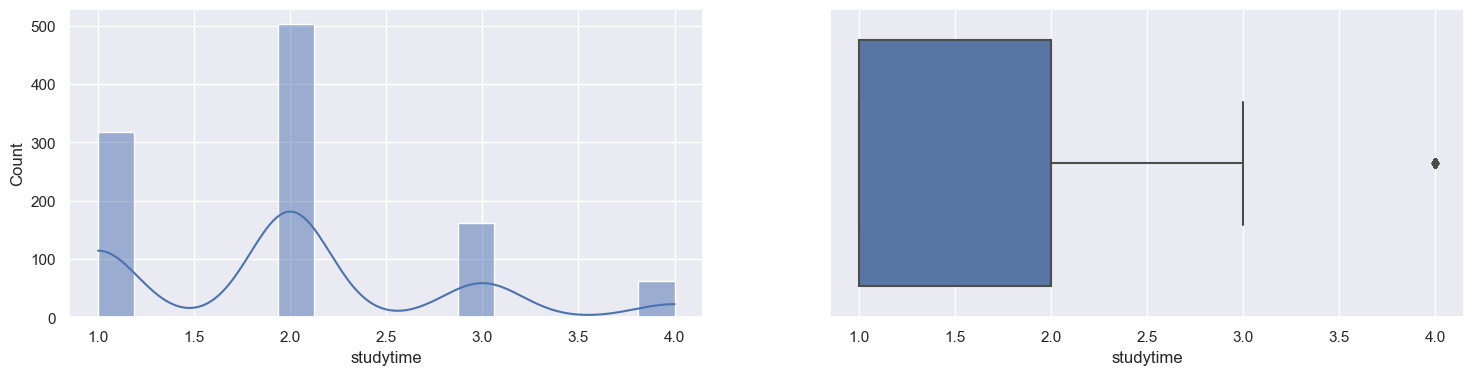

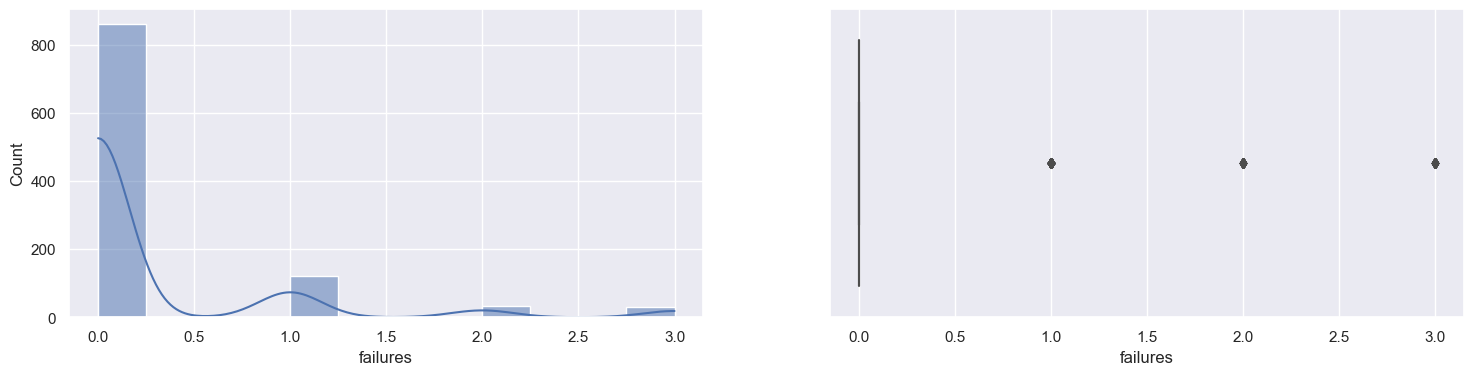

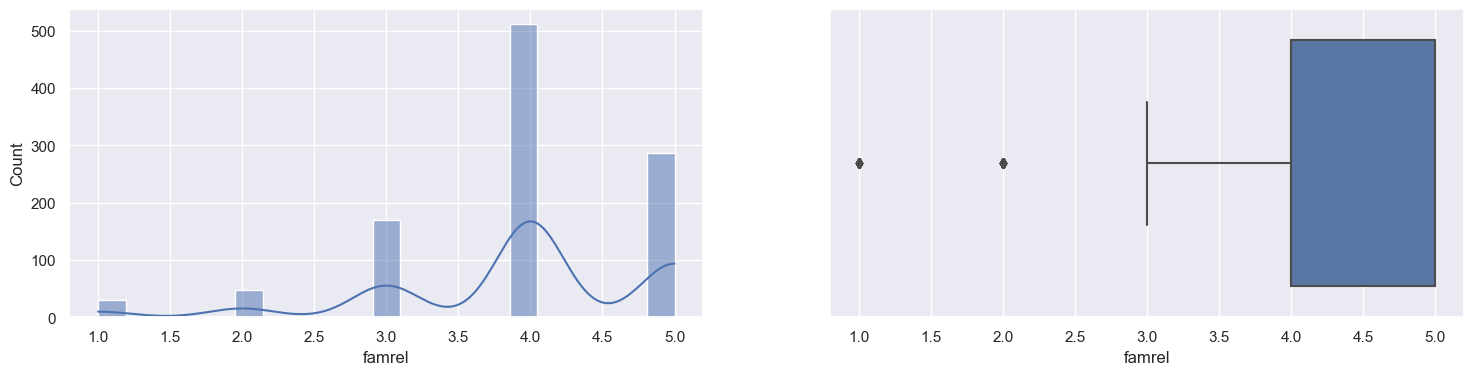

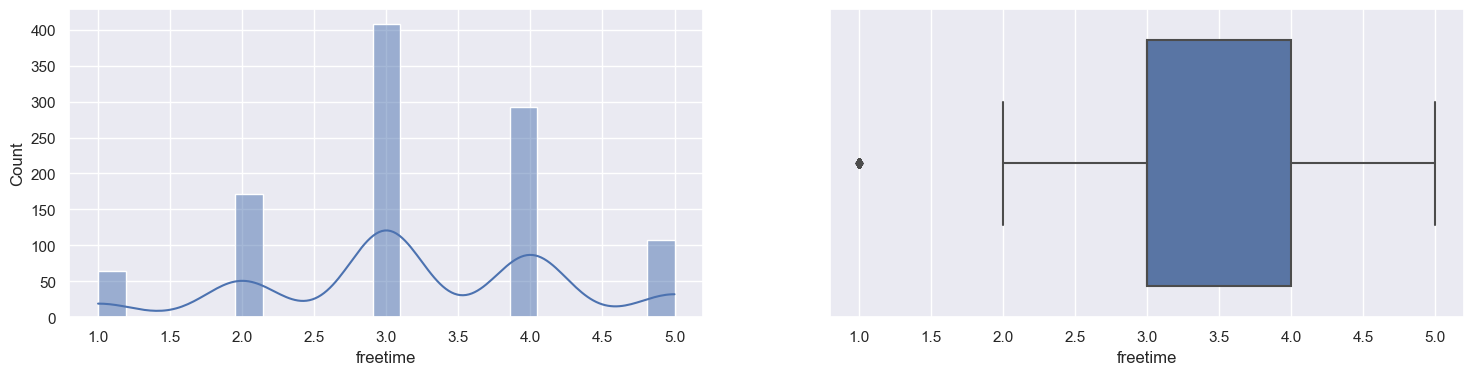

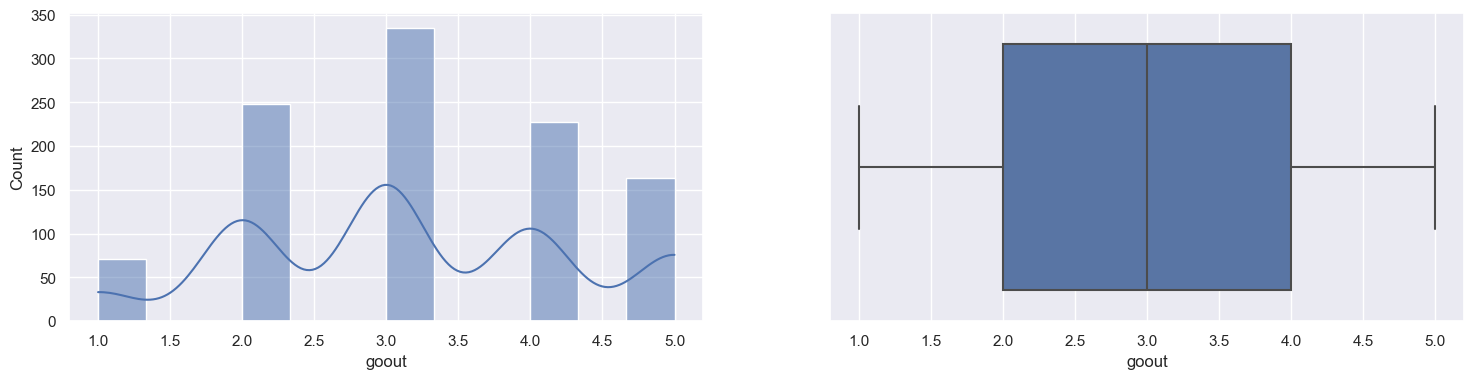

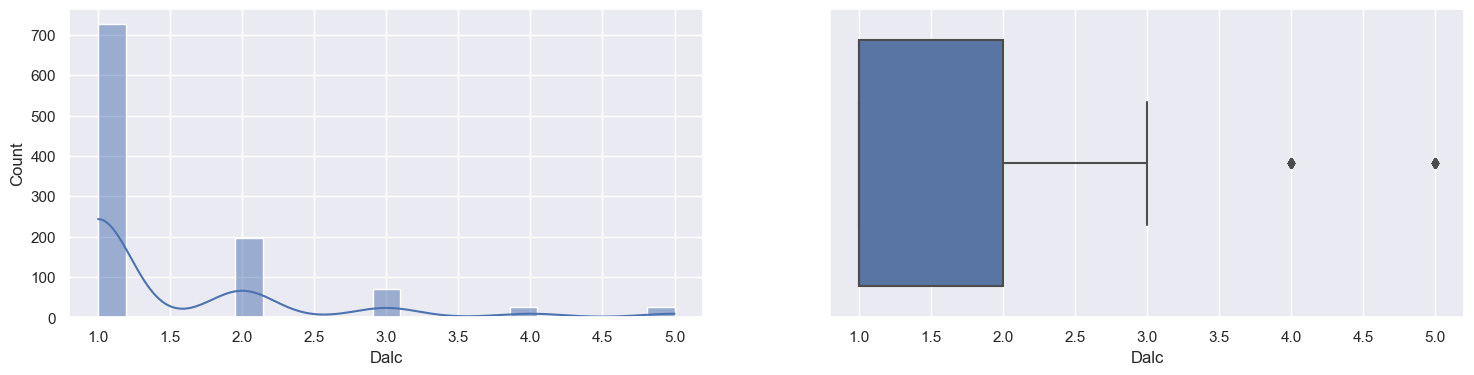

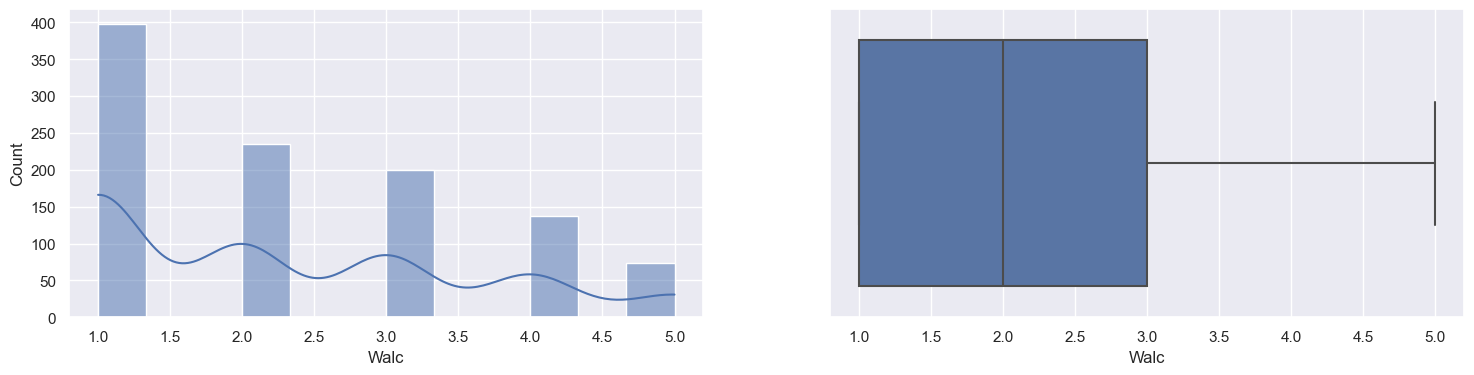

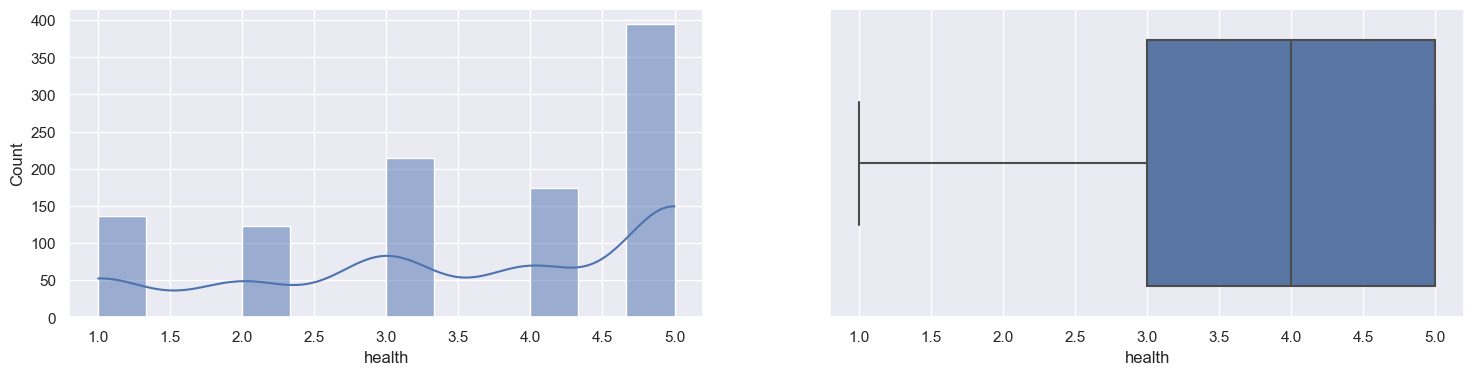

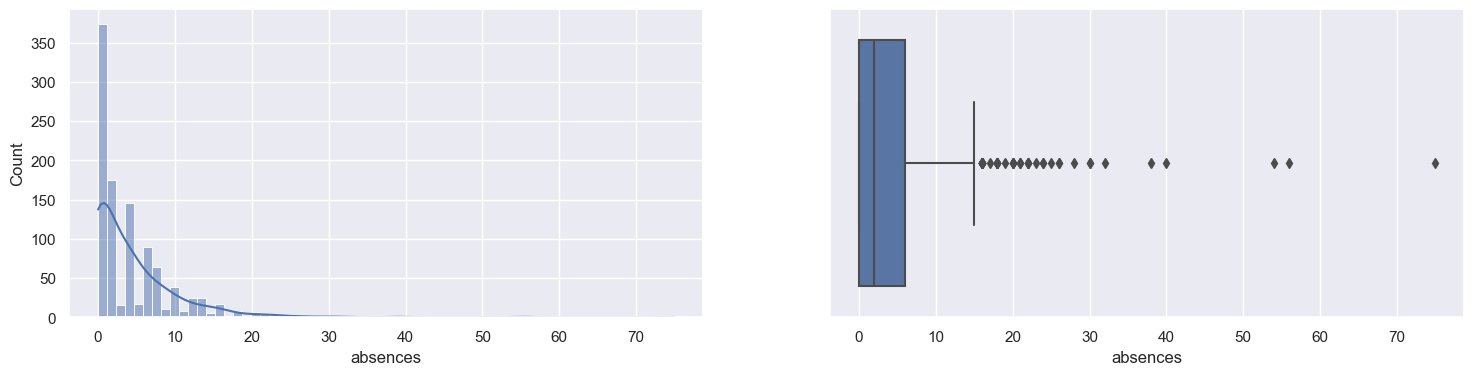

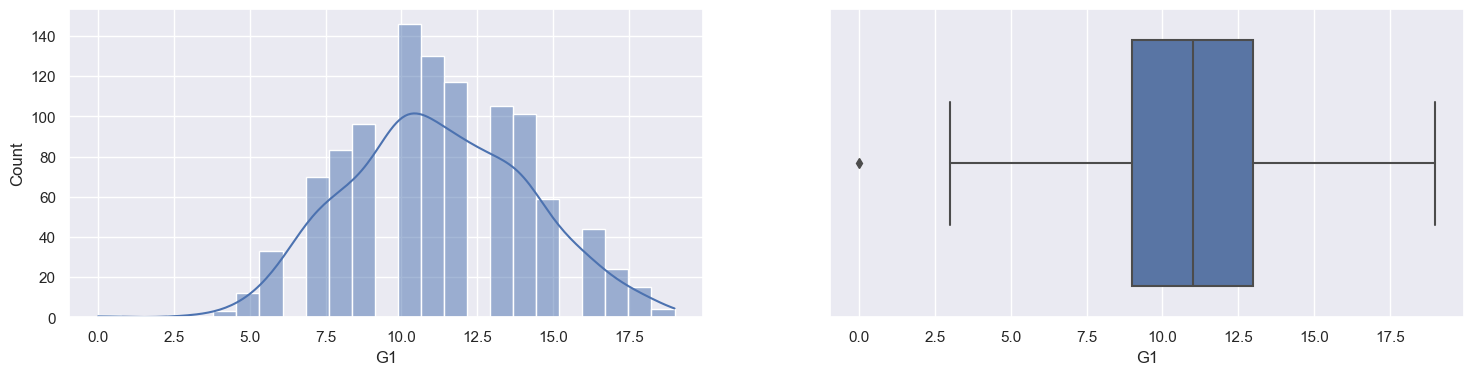

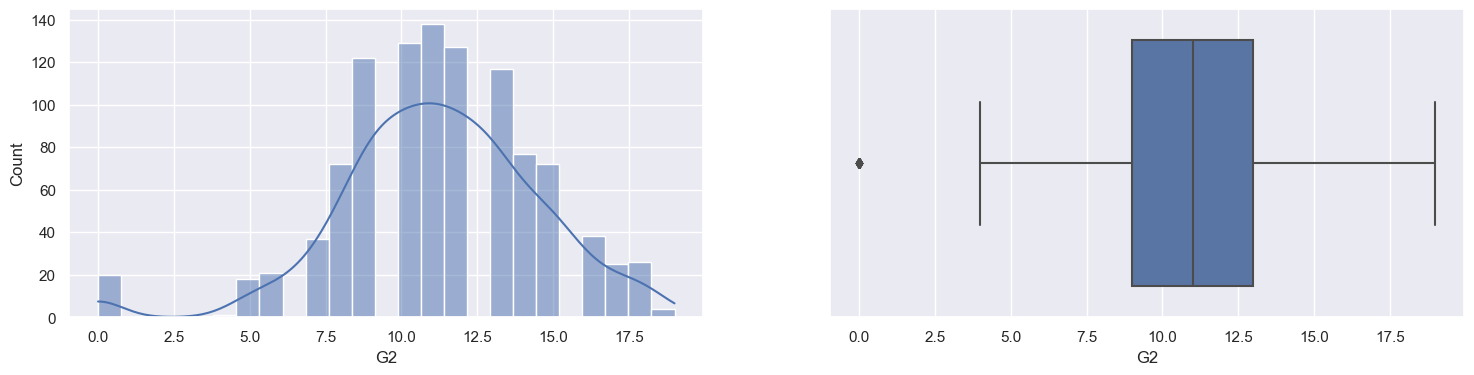

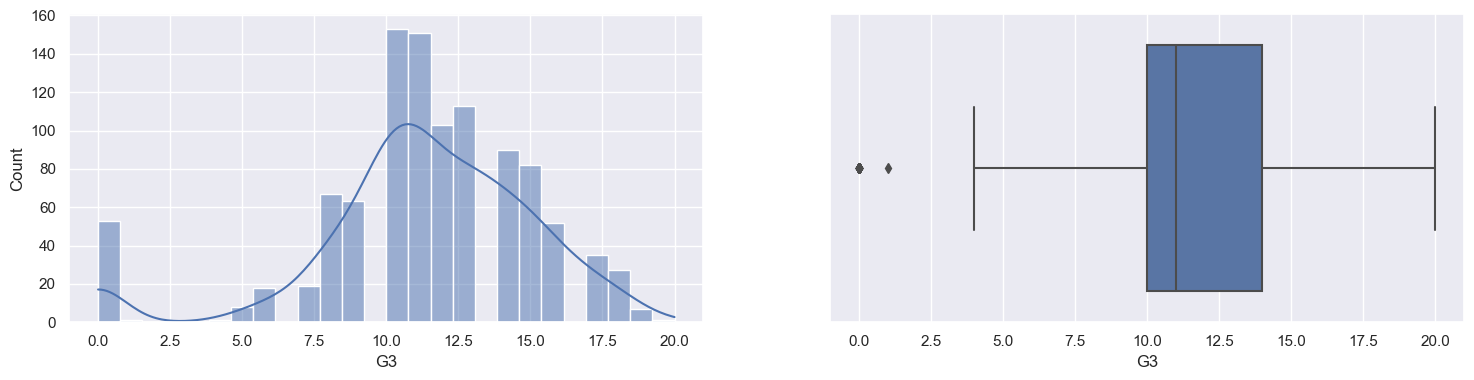

In [33]:
for col in main_df.columns:
  if main_df[col].dtype == 'int64':
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))
    sns.histplot(data=main_df, x=col, ax=axes[0] , kde= True)
    sns.boxplot(data=main_df, x=col, ax=axes[1])
    plt.show()



<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">5. Relationship Between coloums using correlation matrix
</h1>

<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">Using Pandas
</h1>

In [34]:
#getting the correlation
df = df_2.describe()
corr = df.corr()

In [35]:
#ploting using background gradient 
corr.style.background_gradient(cmap= 'coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,0.999710,0.999702,0.999703,0.999708,0.999662,0.999758,0.999742,0.999735,0.999708,0.999712,0.999734,0.999087,0.999793,0.999790,0.999781
Medu,0.999710,1.000000,0.999998,0.999993,0.999993,0.999986,0.999995,0.999998,0.999998,0.999990,0.999994,0.999997,0.999095,0.999784,0.999786,0.999778
Fedu,0.999702,0.999998,1.000000,0.999996,0.999997,0.999991,0.999992,0.999997,0.999999,0.999994,0.999998,0.999997,0.999121,0.999775,0.999778,0.999769
traveltime,0.999703,0.999993,0.999996,1.000000,0.999999,0.999998,0.999985,0.999994,0.999995,0.999999,0.999998,0.999989,0.999131,0.999743,0.999745,0.999732
studytime,0.999708,0.999993,0.999997,0.999999,1.000000,0.999997,0.999987,0.999995,0.999997,0.999997,0.999998,0.999992,0.999114,0.999748,0.999750,0.999739
failures,0.999662,0.999986,0.999991,0.999998,0.999997,1.000000,0.999975,0.999987,0.999988,0.999997,0.999995,0.999980,0.999131,0.999716,0.999718,0.999704
famrel,0.999758,0.999995,0.999992,0.999985,0.999987,0.999975,1.000000,0.999998,0.999995,0.999981,0.999986,0.999995,0.999059,0.999807,0.999808,0.999801
freetime,0.999742,0.999998,0.999997,0.999994,0.999995,0.999987,0.999998,1.000000,0.999999,0.999992,0.999995,0.999996,0.999107,0.999793,0.999795,0.999786
goout,0.999735,0.999998,0.999999,0.999995,0.999997,0.999988,0.999995,0.999999,1.000000,0.999993,0.999998,0.999998,0.999125,0.999790,0.999791,0.999783
Dalc,0.999708,0.999990,0.999994,0.999999,0.999997,0.999997,0.999981,0.999992,0.999993,1.000000,0.999998,0.999986,0.999192,0.999758,0.999760,0.999746




<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">Using Visulisation tools</h1>


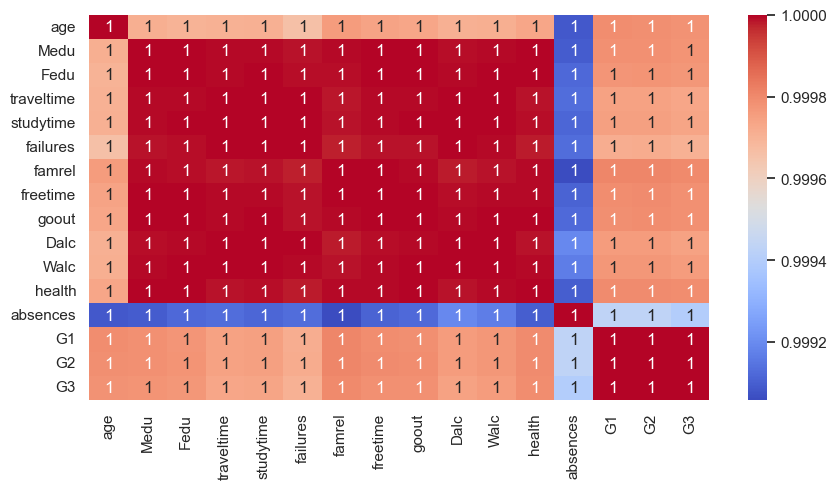

In [36]:
#ploting the correlation using sns
plt.figure(figsize=(10,5))
sns.heatmap(corr , annot=True , cmap='coolwarm')
sns.set_theme()
plt.show()


<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color:orange; color :black;">6. Feature Selection</h1>


In [37]:
# getting the relation of each column with respect to each of the target column
g1 = pd.DataFrame(data=(main_df.corr()['G1']), columns=['G1'])  #for G1 Column
g2 = pd.DataFrame(data=(main_df.corr()['G2']), columns=['G2'])  #for G2 Column
g3 = pd.DataFrame(data=(main_df.corr()['G3']), columns=['G3'])  #for G3 Column

# Merge the dataframes
merged_df = pd.concat([g1, g2, g3], axis=1 )
merged_df.style.background_gradient()

ValueError: could not convert string to float: 'GP'

##### we can clearly see that thier is a strong correlation between these columns and the target columns basically G1,G2,G3 are our target column . due to strong correlation we cannot drop these columns(these are int columns), only the absense is the column where the correlation is relatively low than others , columns with int data type have high correlation with target columns

##### Theare are quite a few columns that doesn't make sence in the performance of the student 

In [ ]:
# dropping the unnecessary columns
df_2.drop(columns=['reason' ,'romantic','sex','address','guardian','famsize'] , inplace=True , axis=1)

In [ ]:
#final dataset for modeling
df_2.head()

,school,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,18,A,4,4,at_home,teacher,2,2,0,...,4,3,4,1,1,3,4,0,11,11
1,GP,17,T,1,1,at_home,other,1,2,0,...,5,3,3,1,1,3,2,9,11,11
2,GP,15,T,1,1,at_home,other,1,2,0,...,4,3,2,2,3,3,6,12,13,12
3,GP,15,T,4,2,health,services,1,3,0,...,3,2,2,1,1,5,0,14,14,14
4,GP,16,T,3,3,other,other,1,2,0,...,4,3,2,1,2,5,0,11,13,13


##### this is the final dataset which we can use for modelling , only we need to convert catogorical data into the numerical format 

<a id="33">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; text-align: center; font-style: normal; background-color: orange; color :black;"> Thank You..... </h1>